In [400]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [401]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [402]:
# df1=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df1=pd.read_csv('data\diabetes.csv')
df1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [403]:
#displays the data types of the columns in the dataset.
df1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [404]:
#displays the minimum value of the 'Age' column.
df1['Age'].min() 

21

In [405]:
#replacing all instances of 0 in the specified columns with NaN (Not a Number) to handle missing values.

df1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]=df1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']].replace(0,np.nan)

In [406]:
#displays the sum of missing values (NaN) in each column of the dataset.
df1.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

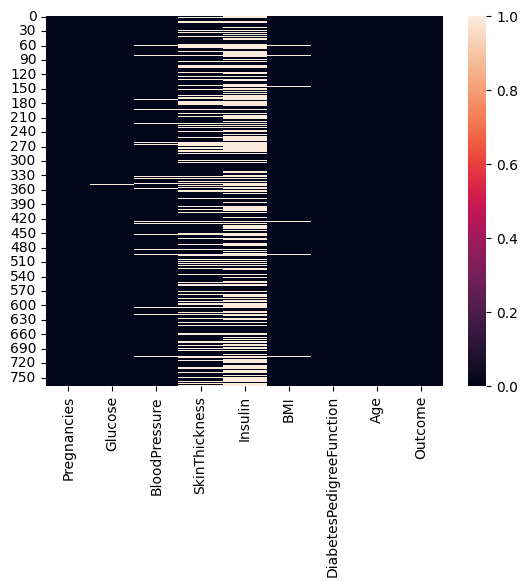

In [407]:
#creating a heatmap visualization to display missing values in the dataset.
sns.heatmap(df1.isnull())

In [408]:
#imputing missing values in the 'Glucose' column with the minimum value of that column.
min_glucose=df1['Glucose'].min()
df1['Glucose']=df1['Glucose'].replace(np.nan, min_glucose )

In [409]:
#imputing missing values in the 'BloodPressure' column with the minimum value of that column.
min_bloodpressure=df1['BloodPressure'].min()
df1['BloodPressure']=df1['BloodPressure'].replace(np.nan, min_bloodpressure)

In [410]:
min_BMI=df1['BMI'].min()
df1['BMI']=df1['BMI'].replace(np.nan, min_BMI)

In [411]:
df1.mean()

Pregnancies                   3.845052
Glucose                     121.180990
BloodPressure                70.199219
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.253255
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [412]:
df1.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [413]:
# Using the IterativeImputer from scikit-learn to impute missing values in the specified columns using a Random Forest Regressor. It then displays the sum of missing values in each column after imputation.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imputer = IterativeImputer(estimator=RandomForestRegressor(),random_state=10)

df1[['SkinThickness','BMI','Glucose', 'BloodPressure','Insulin']]=imputer.fit_transform(df1[['SkinThickness','BMI','Glucose', 'BloodPressure','Insulin']])
df1.isna().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [414]:
df1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,207.44,33.6,0.627,50,1
1,1,85.0,66.0,29.00,56.75,26.6,0.351,31,0
2,8,183.0,64.0,16.83,243.29,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.00,43.1,2.288,33,1
5,5,116.0,74.0,18.79,100.28,25.6,0.201,30,0
6,3,78.0,50.0,32.00,88.00,31.0,0.248,26,1
7,10,115.0,24.0,38.37,119.42,35.3,0.134,29,0
8,2,197.0,70.0,45.00,543.00,30.5,0.158,53,1
9,8,125.0,96.0,16.64,180.62,18.2,0.232,54,1


In [415]:
df1=df1.drop('Pregnancies', axis=1) #Domain knowledge suggests that "Pregnancies" might not be directly related to diabetes

In [416]:
df1.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.00,207.44,33.6,0.627,50,1
1,85.0,66.0,29.00,56.75,26.6,0.351,31,0
2,183.0,64.0,16.83,243.29,23.3,0.672,32,1
3,89.0,66.0,23.00,94.00,28.1,0.167,21,0
4,137.0,40.0,35.00,168.00,43.1,2.288,33,1
5,116.0,74.0,18.79,100.28,25.6,0.201,30,0
6,78.0,50.0,32.00,88.00,31.0,0.248,26,1
7,115.0,24.0,38.37,119.42,35.3,0.134,29,0
8,197.0,70.0,45.00,543.00,30.5,0.158,53,1
9,125.0,96.0,16.64,180.62,18.2,0.232,54,1


<Axes: >

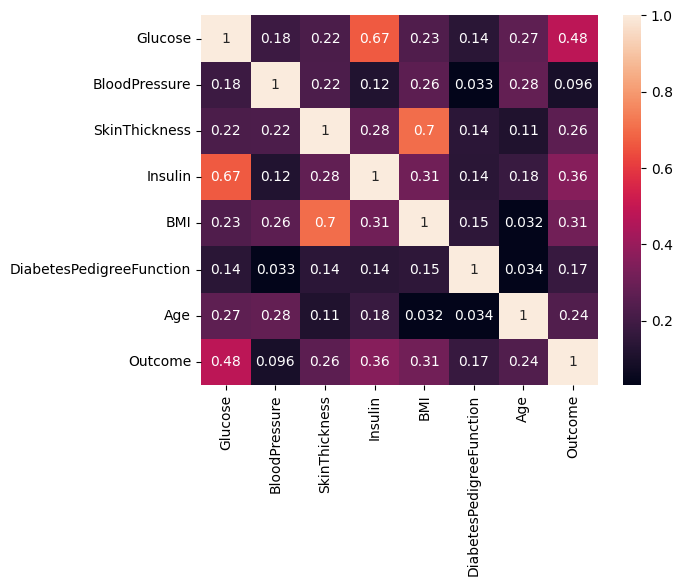

In [417]:
#computeing the correlation matrix for the dataset and visualizes it using a heatmap with annotations.
    
correlation_matrix=df1.corr()
sns.heatmap(correlation_matrix, annot=True)

<Axes: xlabel='Outcome', ylabel='count'>

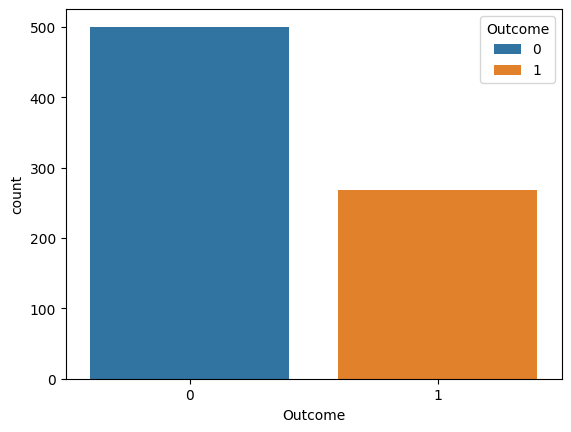

In [418]:
sns.countplot(x='Outcome',hue='Outcome',data=df1)

In [419]:
data_length = len(df1)
having_diabetic = (len(df1[df1.Outcome==1])/data_length)*100
print(f'Population in our sample who is diabetic : {round(having_diabetic,2)}%')
non_diabetic = (len(df1[df1.Outcome==0])/data_length)*100
print(f'Population in our sample who is non-diabetic : {round(non_diabetic,2)}%')

Population in our sample who is diabetic : 34.9%
Population in our sample who is non-diabetic : 65.1%


Text(0.5, 0, 'Outcome')

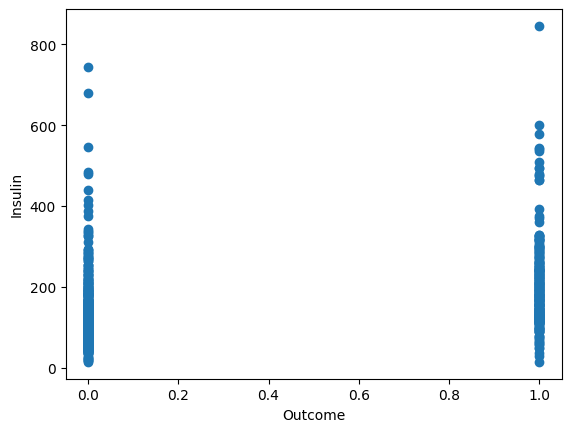

In [420]:
# Creating a scatter plot to visualize the relationship between 'Outcome' and 'Insulin' in the dataset.
plt.scatter(x='Outcome',y='Insulin',data=df1)
plt.ylabel('Insulin')
plt.xlabel('Outcome')

Text(0.5, 0, 'Outcome')

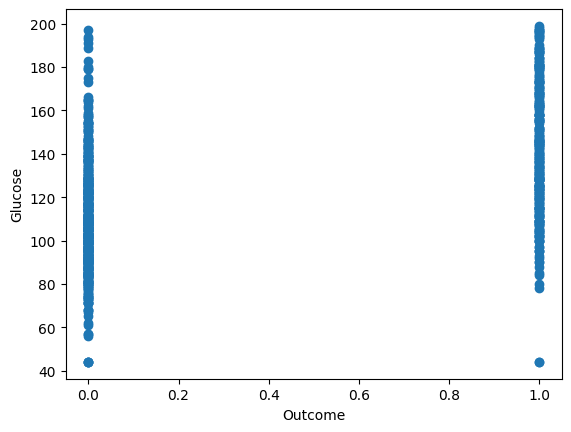

In [421]:
plt.scatter(x='Outcome',y='Glucose',data=df1)
plt.ylabel('Glucose')
plt.xlabel('Outcome')

Text(0.5, 0, 'Outcome')

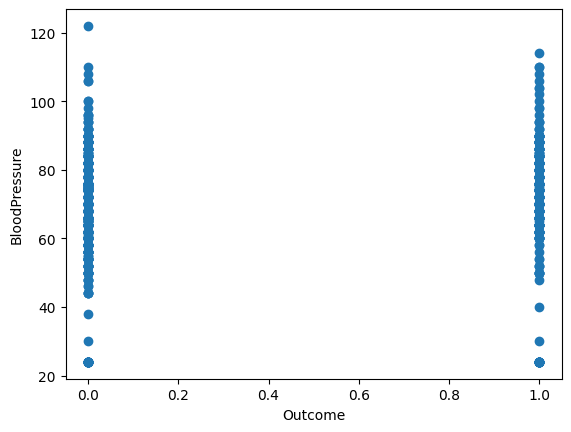

In [422]:
plt.scatter(x='Outcome',y='BloodPressure',data=df1)
plt.ylabel('BloodPressure')
plt.xlabel('Outcome')

Text(0.5, 1.0, 'Insulin histogram')

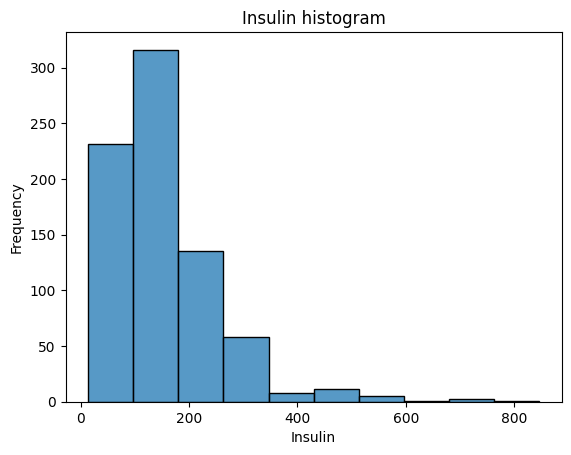

In [423]:
#creates a histogram plot for the 'Insulin' column of the dataset
sns.histplot(df1['Insulin'],bins=10)
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Insulin histogram')

In [424]:
#Defines a function 'full_diagnostic' that creates a pairplot visualization for the numerical columns of the dataset, excluding specified columns.
#The pairplot shows the relationship between each pair of numerical features.

def full_diagnostic(df1,class_col,cols_to_exclude):
  import seaborn as sns
  import numpy as np
  cols=df1.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df1[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  sns.pairplot(df1,hue = class_col)

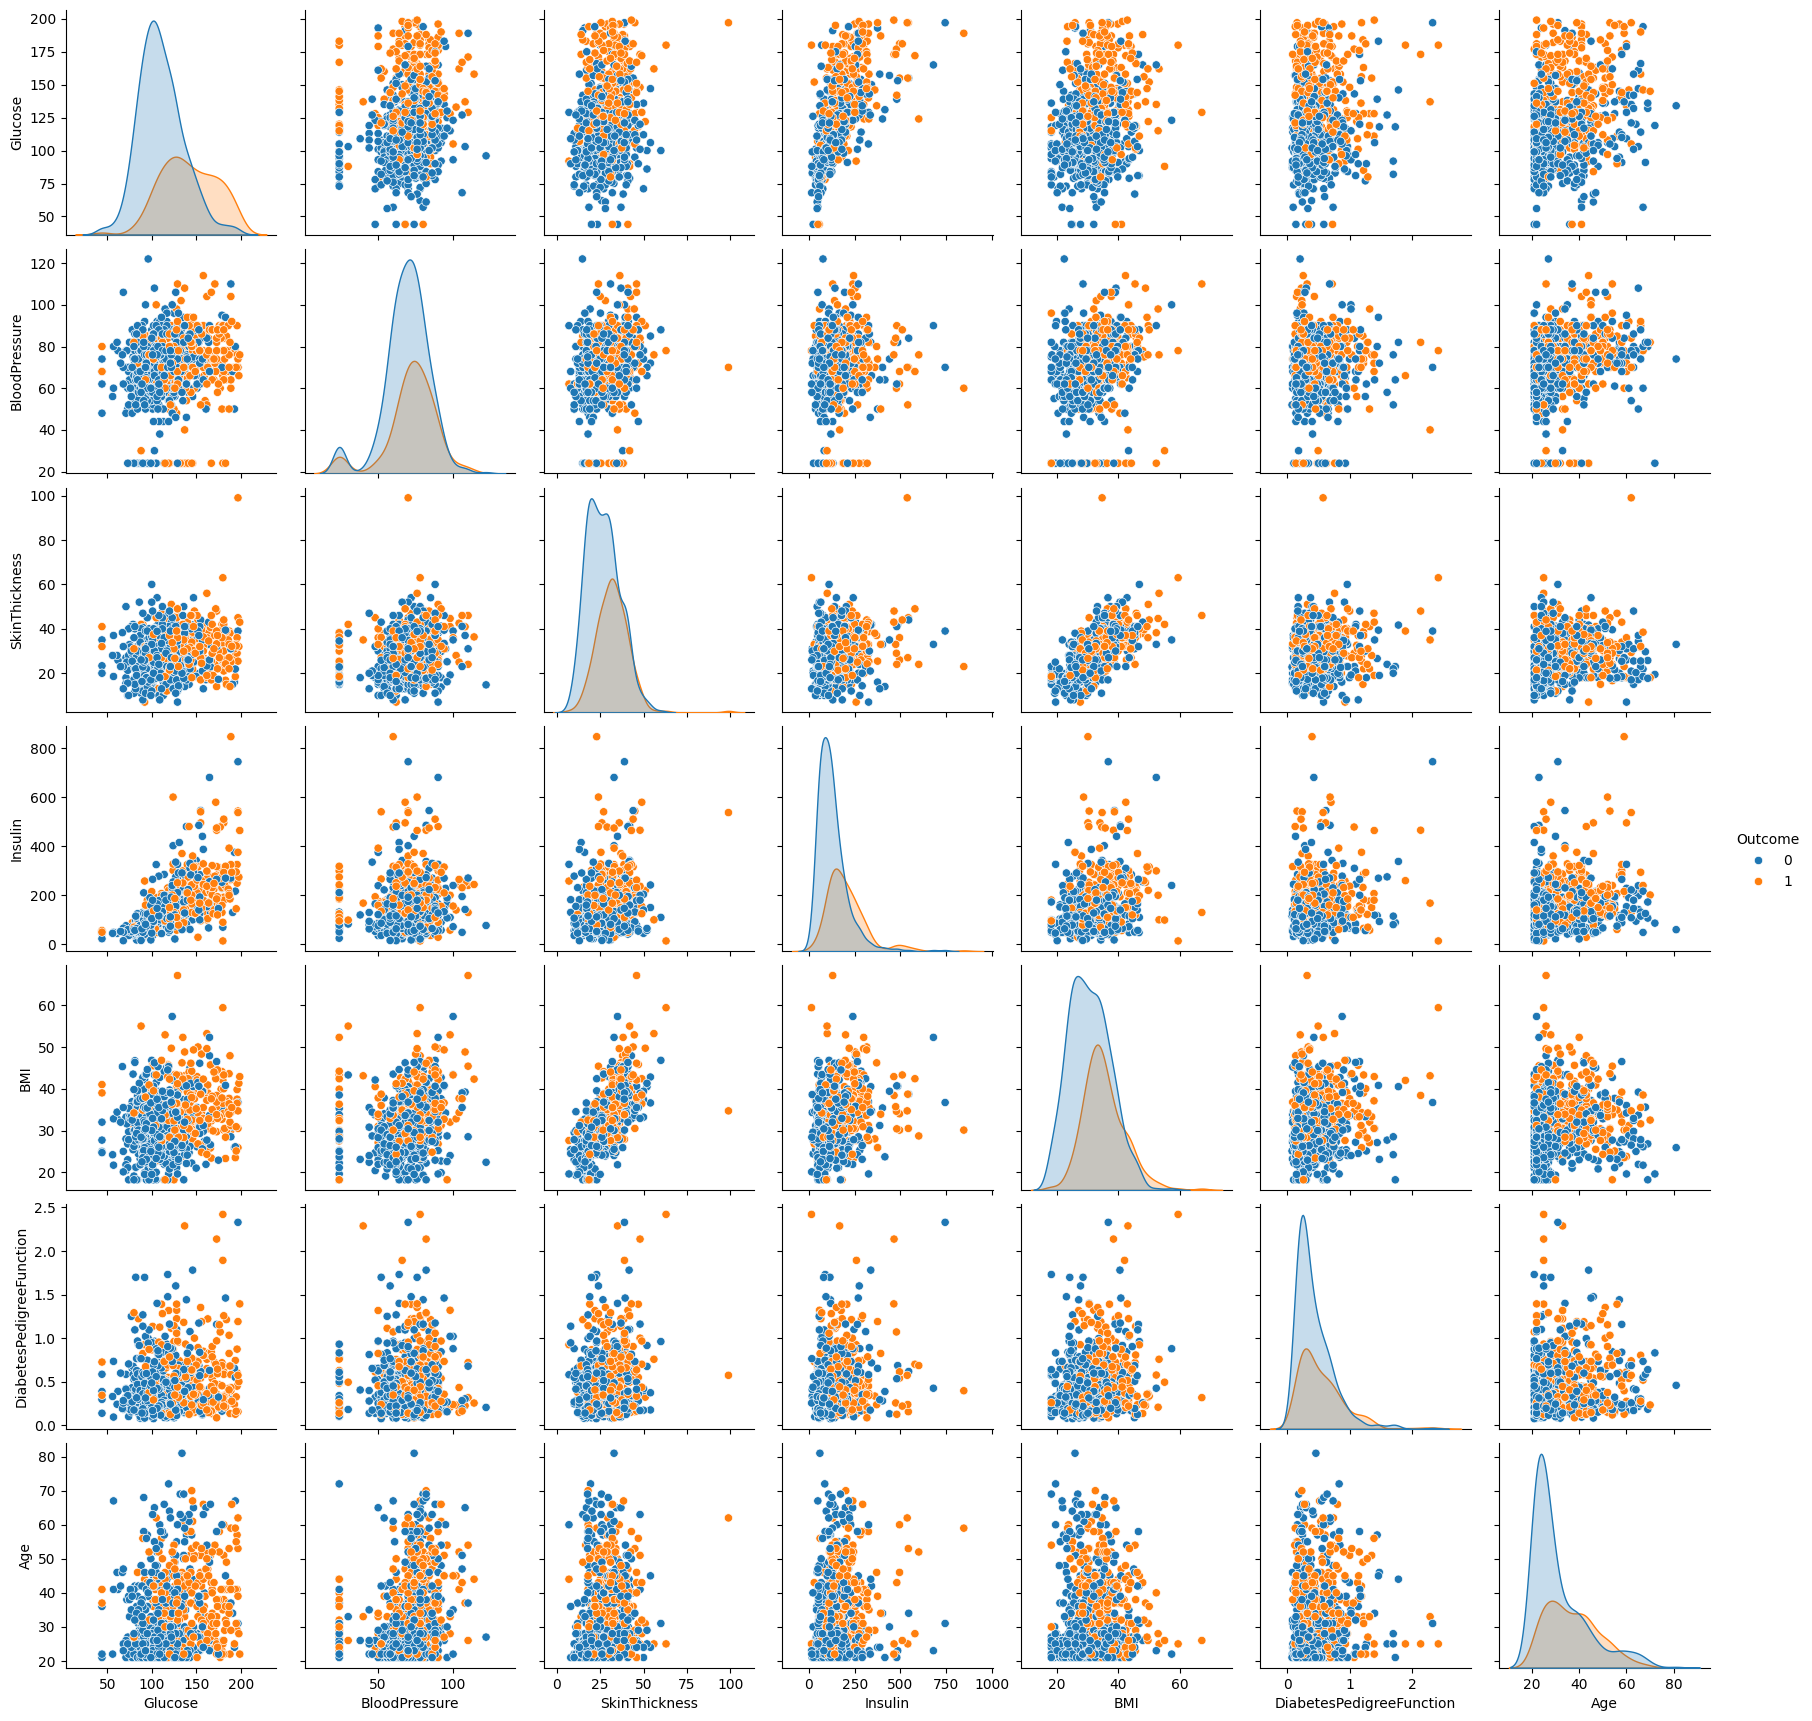

In [425]:
full_diagnostic(df1,class_col = 'Outcome',cols_to_exclude=['Age'])

In [426]:
# Scaling the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1.drop('Outcome', axis=1))
ScaledX=pd.DataFrame(X_scaled)

In [427]:
# Scaling the features using RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df1.drop('Outcome', axis=1))
RobustX=pd.DataFrame(X_scaled)

In [428]:
# Splitting the dataset and oversampling using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df1.drop('Outcome',axis=1),df1['Outcome'],test_size=0.2, random_state=101)
#RobustScaler and StandardScaler didn't affect the accuracy or the ROC_AUC of the model.

In [429]:
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) #Oversampling of the dataset didn't improve the ROC_AUC or the precision of the model.

In [430]:
# Displaying dataset shapes before and after oversampling
print('Original dataset shape:', Counter(y_train))
print('Oversampled dataset shape:', Counter(y_train_res))

Original dataset shape: Counter({0: 397, 1: 217})
Oversampled dataset shape: Counter({1: 397, 0: 397})


In [431]:
# Training Logistic Regression models with different solvers and analyzing the accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

for solve in ('liblinear', 'sag', 'newton-cholesky', 'newton-cg', 'saga', 'lbfgs'):
  LRModel=LogisticRegression(solver=solve, max_iter=7600, random_state=101)  #class_weight='balanced' didn't improve the ROC_AUC of the model, despite decreased the accuracy of the model.
  LRModel.fit(X_train,y_train)
  predictions_diabetes=LRModel.predict(X_test)
  print(solve)
  print(accuracy_score(y_test,predictions_diabetes))

liblinear
0.8051948051948052


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


sag
0.7597402597402597
newton-cholesky
0.8116883116883117
newton-cg
0.8116883116883117
saga
0.7662337662337663
lbfgs
0.8116883116883117


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [432]:
# Training final Logistic Regression model
LRModel=LogisticRegression(solver='lbfgs', max_iter=7600, random_state=101)  #class_weight='balanced' didn't improve the ROC_AUC of the model, despite decreased the accuracy of the model.
LRModel.fit(X_train,y_train)

LogisticRegression(max_iter=7600, random_state=101)

In [433]:
predictions_diabetes=LRModel.predict(X_test)

In [434]:
# Displaying classification report
print(classification_report(y_test,predictions_diabetes))

#Precision: Out of all the positive predictions made by the model, how many were correct;
#Recall: Out of all the actual positive cases, how many did the model correctly identified;

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       103
           1       0.75      0.65      0.69        51

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



<Axes: >

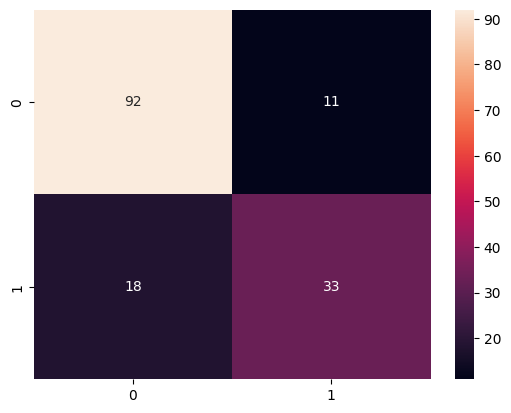

In [435]:
# Displaying confusion matrix
cm=confusion_matrix(y_test, predictions_diabetes)
sns.heatmap(cm, annot=True)

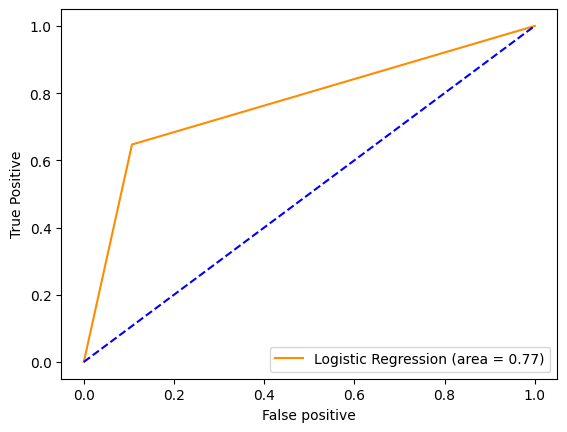

In [436]:
# Calculating and plotting ROC AUC curve
logit_roc_auc = roc_auc_score(y_test, LRModel.predict(X_test)) # ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, LRModel.predict(X_test)) # ROC curve

plt.plot(fpr, tpr,color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'b--') #Plotting the worst line possiple
plt.xlabel('False positive')
plt.ylabel('True Positive')
plt.legend(loc='lower right')

In [437]:
df1['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [438]:
# Training Support Vector Machine models with different kernels
from sklearn import svm

for k in ('linear','sigmoid','poly','rbf'):
    model = svm.SVC(kernel=k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(k)
    print(accuracy_score(y_test,y_pred))

linear
0.8116883116883117
sigmoid
0.4025974025974026
poly
0.7987012987012987
rbf
0.7987012987012987


In [439]:
# Training final Support Vector Machine model
final_model = svm.SVC(kernel='linear')
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_test)
print(classification_report(y_test,y_pred)) #Displaying Classification Report

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       103
           1       0.78      0.61      0.68        51

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



<Axes: >

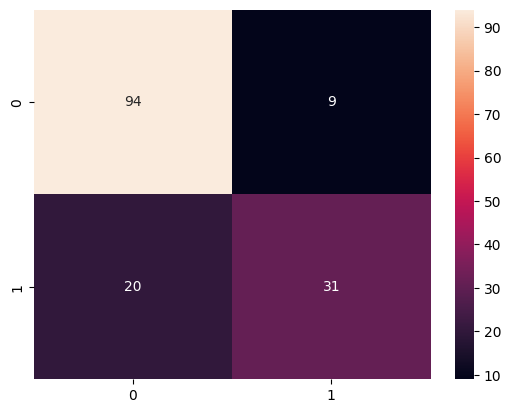

In [440]:
#Displaying confusion matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

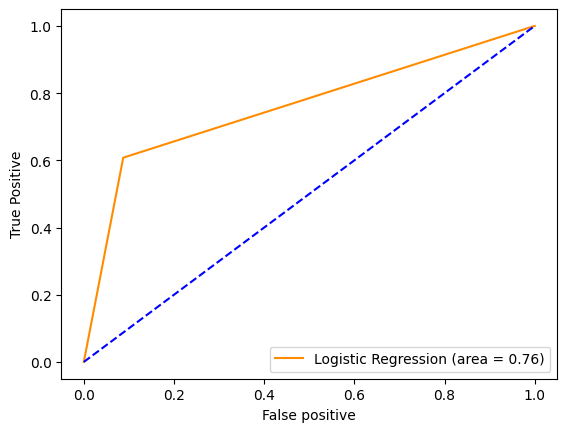

In [441]:
# Calculating and plotting ROC AUC curve for SVM
logit_roc_auc = roc_auc_score(y_test, y_pred) # ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred) # ROC curve

plt.plot(fpr, tpr,color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#Plotting the worst line possiple
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('False positive')
plt.ylabel('True Positive')
plt.legend(loc='lower right')